Analysis -> Feature Engineering -> Model -> Web Application

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
sns.set_style("whitegrid")

In [9]:
df = pd.read_csv("german_credit_data.csv")

In [10]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [12]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [13]:
df.shape

(1000, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df["Job"].unique()

array([2, 1, 3, 0], dtype=int64)

In [17]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df = df.dropna().reset_index(drop=True)

In [20]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [22]:
df.drop(columns = "Unnamed: 0", inplace=True)

In [23]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

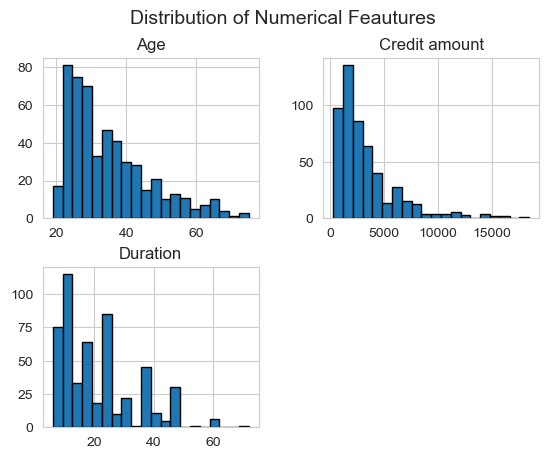

In [24]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 20, edgecolor = "black")
plt.suptitle("Distribution of Numerical Feautures", fontsize = 14)
plt.show()

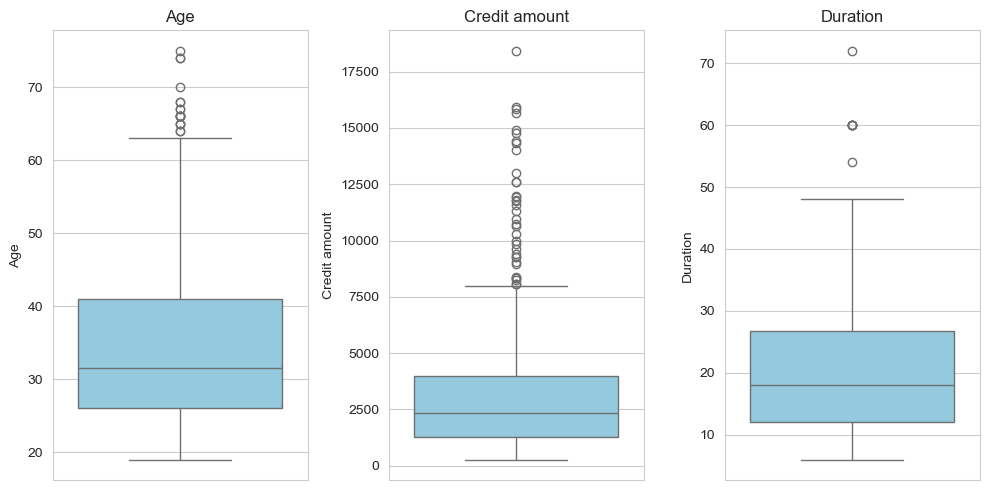

In [25]:
plt.figure(figsize = (10, 5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[col], color = 'skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [27]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\1085376898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = col, palette = "Set2", order = df[col].value_counts().index)
C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\1085376898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = col, palette = "Set2", order = df[col].value_counts().index)
C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\1085376898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = col, palette = "Set2", order = df[col].va

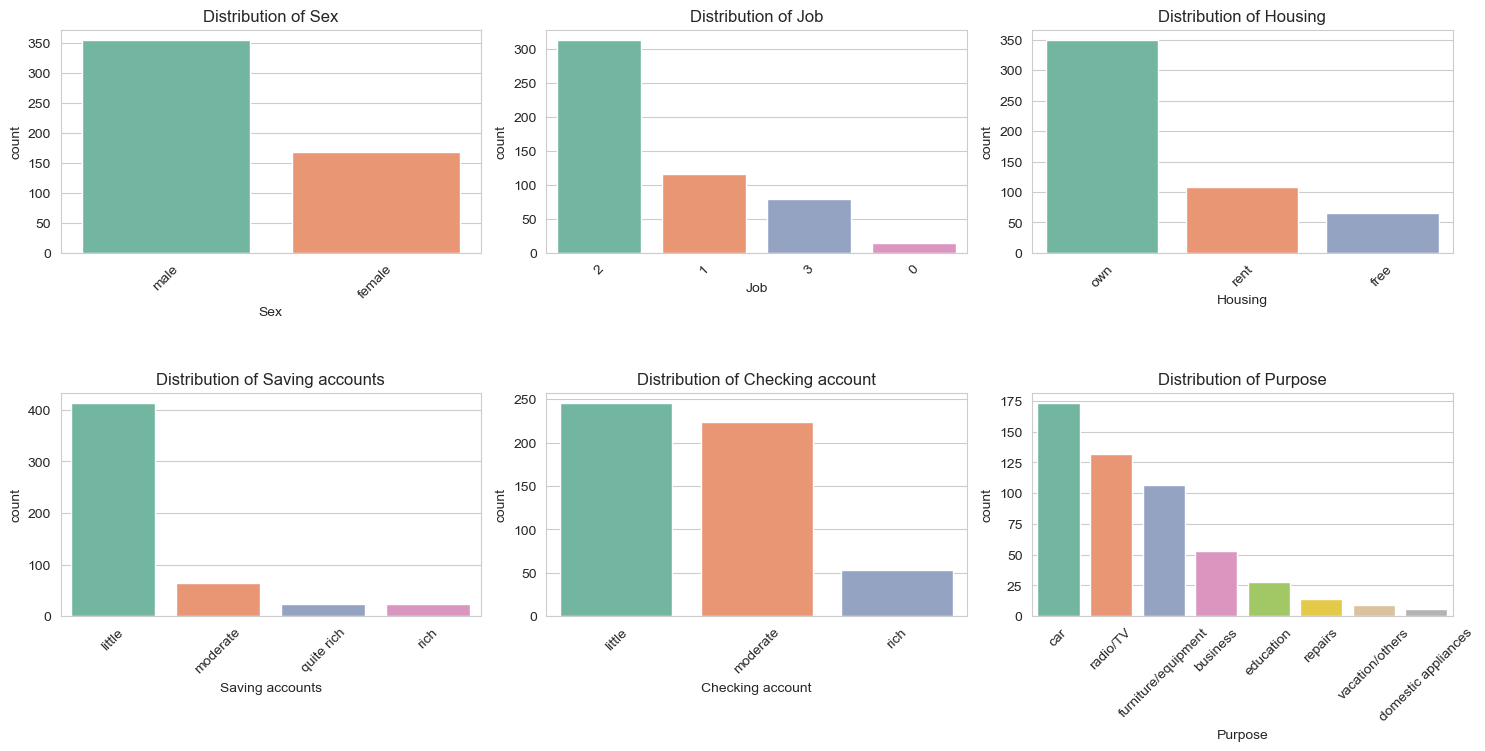

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x = col, palette = "Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


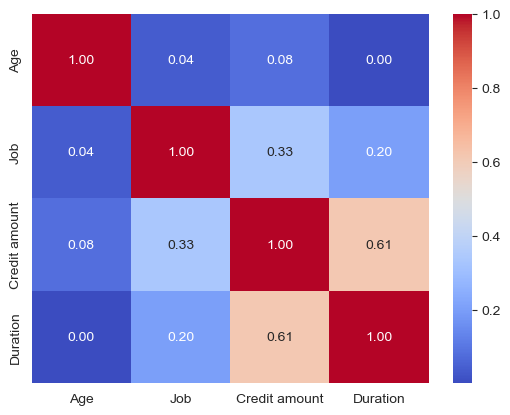

In [30]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [31]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [32]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [33]:
pd.pivot_table(df, values="Credit amount", index = "Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


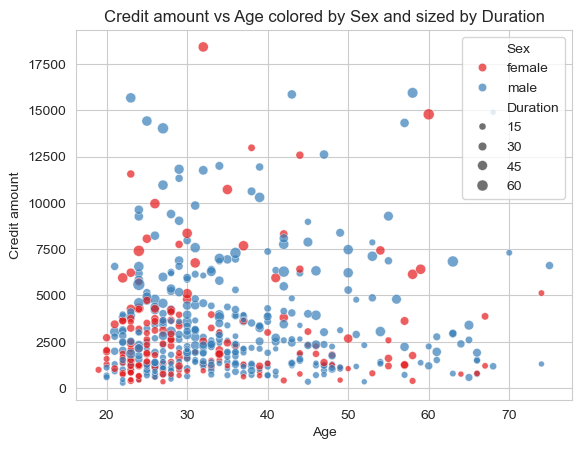

In [34]:
sns.scatterplot(data=df, x = "Age", y = "Credit amount", hue="Sex", size = "Duration", alpha = 0.7, palette = "Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\804730127.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount", palette = "Pastel1")


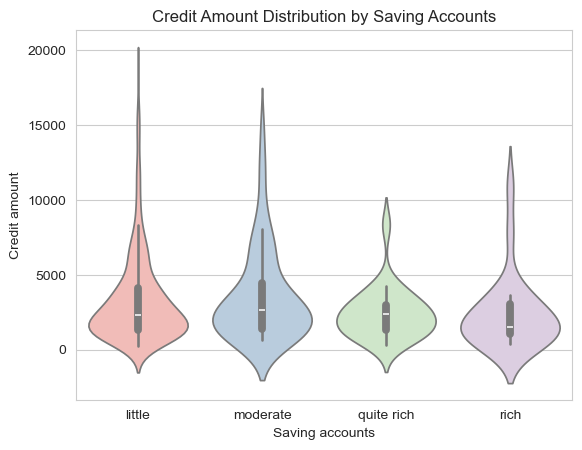

In [35]:
sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount", palette = "Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [36]:
df["Risk"].value_counts(normalize = True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\1362336563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\1362336563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
C:\Users\Дамош\AppData\Local\Temp\ipykernel_12356\1362336563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")


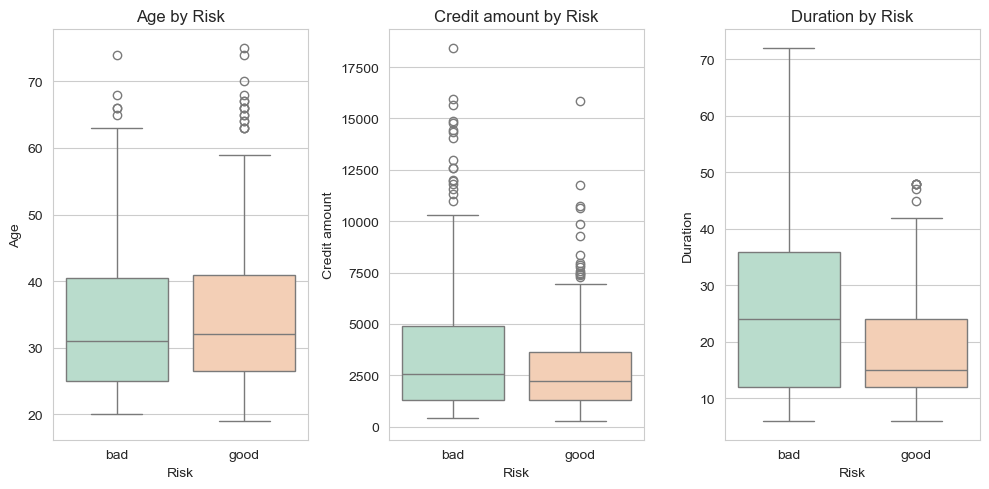

In [37]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [38]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [39]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

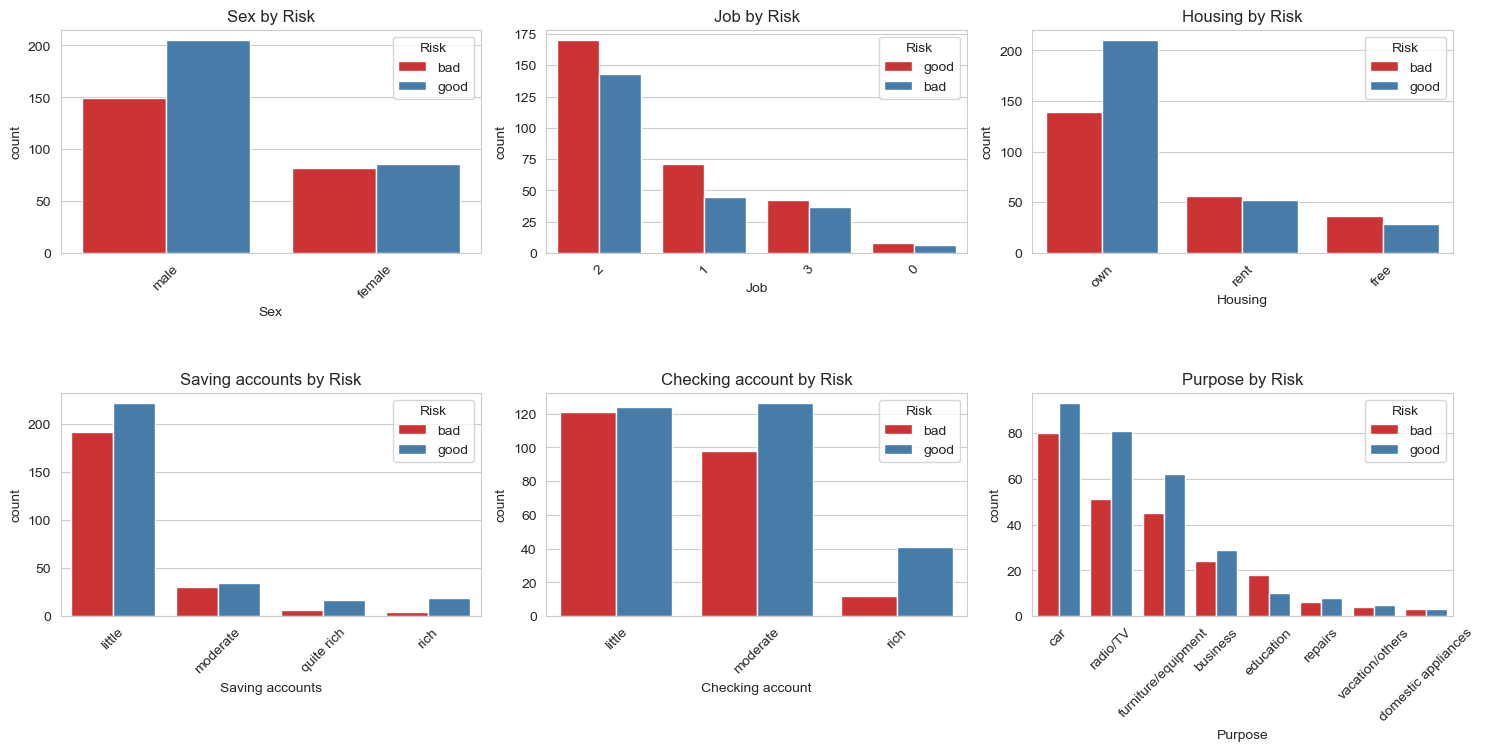

In [40]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [41]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [42]:
feautures = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [43]:
target = "Risk"

In [44]:
df_model = df[feautures + [target]].copy()

In [45]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [46]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [47]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")

In [48]:
le_dict = {}

In [49]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [50]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [51]:
le_target = LabelEncoder()

In [52]:
target

'Risk'

In [53]:
df_model[target] = le_target.fit_transform(df_model[target])

In [54]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [55]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [56]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df_model.drop(target, axis = 1)

In [59]:
y = df_model[target]

In [60]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [61]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int32

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [63]:
X_train.shape

(417, 8)

In [64]:
X_test.shape

(105, 8)

In [65]:
! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 187.9 kB/s eta 0:06:23
   ---------------------------------------- 0.0/72.0 MB 187.9 kB/s eta 0:06:23
   ---------------------------------------- 0.1/72.0 MB 233.8 kB/s eta 0:05:08
   ---------------------------------------- 0.1/72.0 MB 309.1 kB/s eta 0:03:53
   ---------------------------------------- 0.1/72.0 MB 309.1 kB/s eta 0:03:53
   ---------------------------------------- 0.1/72.0 MB 313.8 kB/s eta 0:03:50
   ---------------------------------------- 0.2/72.0 MB 403.5 kB/s eta 0:02:58
   ---------------------------------------- 0.2/72.0 MB 429.5 kB/s eta 0:02:48
   ---------------------------------------- 0.2/72.0 MB 429.5 kB/s eta 0:02:48
   ------

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [67]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs = -1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [69]:
dt = DecisionTreeClassifier(random_state=1, class_weight = "balanced")
dt_param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf":[1, 2, 4]
}

In [70]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [71]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.580952380952381


In [72]:
print("Best parameters", params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [74]:
rf = RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [75]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth" : [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [76]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [77]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.6190476190476191


In [78]:
print("Best parameters", params_rf)

Best parameters {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [79]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [82]:
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [83]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [84]:
print("Extra Trees accuracy", acc_et)

Extra Trees accuracy 0.6476190476190476


In [85]:
print("ExtraTree best parameters", params_et)

ExtraTree best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [87]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train == 0).sum() / (y_train ==1).sum(),
                    use_label_encoder = False, eval_metric = "logloss")

In [88]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth" : [3, 4, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

In [89]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

c:\Python3\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:56:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [90]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.6666666666666666


In [91]:
print("Best params", params_xgb)

Best params {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1}


In [92]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']